In [1]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.animation import FuncAnimation, ArtistAnimation
#from rydbperc.cython_utilities import util
from rydbperc import ryperc
import numpy as np

density =  0.15625


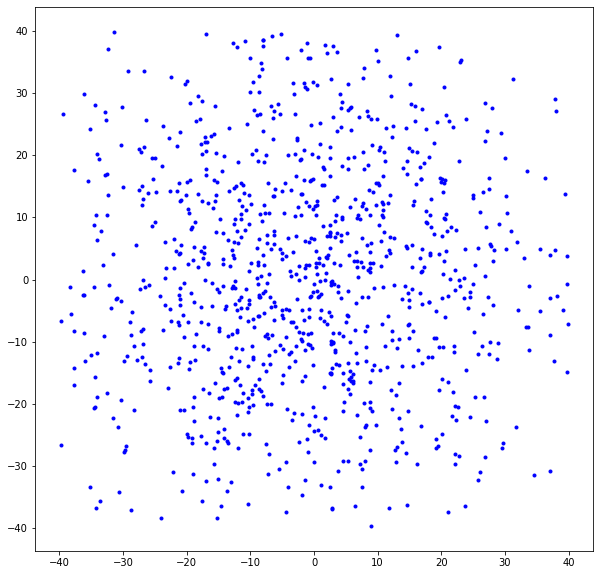

In [2]:
N_points = 1000
radius_MOT = 20
radius_shell = 6
delta_radius_shell = 0.6
p_spont_exc = 0.0008
p_spont_emi = 0.01
p_facilitation = 0.1

shape = [80,80,100]
density = N_points/(shape[0]*shape[1]*shape[2]*10**-2) # atoms/cm^3

print("density = ",density)
clu = ryperc.cluster3D(N_points, shape, distribution="gaussian", MOT_radius=radius_MOT, is_2D=True)

clu.set_evolution_parameters(
                            shell_radius=radius_shell, 
                            shell_delta=delta_radius_shell, 
                            p_spont_exct=p_spont_exc, 
                            p_emission=p_spont_emi, 
                            p_fac=p_facilitation
                            )

clu.evolution_step()
clu.show()

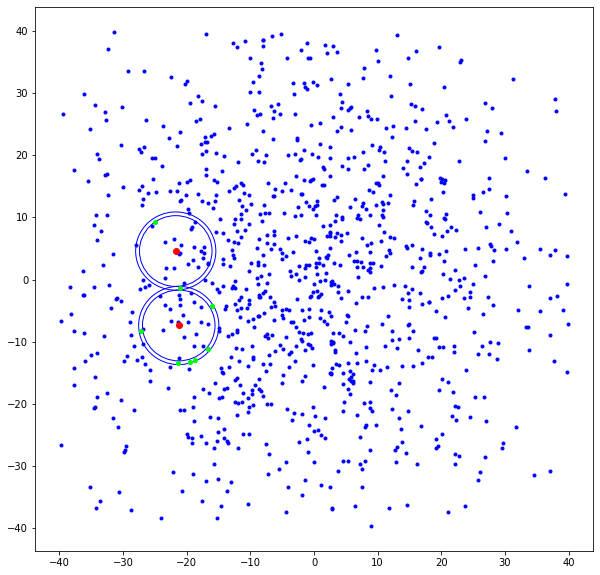

In [7]:
clu.evolve(1)
clu.show()

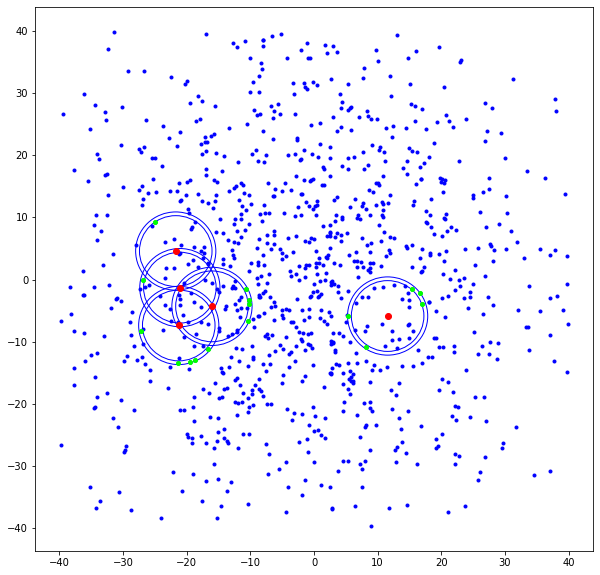

In [8]:
clu.evolve(1)
clu.show()